In [1]:
# import necessary libraries

import pandas as pd
import numpy as np


# Create date range
date_rng = pd.date_range(start='2035-01-01', end='2035-01-10', freq='H')

np.random.seed(42)

# Simulate data
df = pd.DataFrame(date_rng, columns=['Timestamp'])
df['Vehicle_Count'] = np.random.randint(200, 600, size=(len(date_rng)))
df['AV_Vehicle_Count'] = (df['Vehicle_Count'] * np.random.uniform(0.2, 0.6, size=(len(date_rng)))).astype(int)
df['Signal_Status'] = np.random.choice(['Green', 'Red', 'Yellow'], size=len(date_rng))

print(df.head())
df.to_csv('simulated_traffic_v2i.csv', index=False)


            Timestamp  Vehicle_Count  AV_Vehicle_Count Signal_Status
0 2035-01-01 00:00:00            302                90        Yellow
1 2035-01-01 01:00:00            548               218           Red
2 2035-01-01 02:00:00            470               150        Yellow
3 2035-01-01 03:00:00            306                96         Green
4 2035-01-01 04:00:00            271                58         Green


C:\Users\ANIKET\AppData\Local\Temp\ipykernel_3548\2783446446.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2035-01-01', end='2035-01-10', freq='H')


c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


2035-01-10 01:00:00    384.315406
2035-01-10 02:00:00    420.609512
2035-01-10 03:00:00    386.426650
2035-01-10 04:00:00    420.513313
2035-01-10 05:00:00    386.431149
2035-01-10 06:00:00    420.512988
2035-01-10 07:00:00    386.431284
2035-01-10 08:00:00    420.512861
2035-01-10 09:00:00    386.431411
2035-01-10 10:00:00    420.512734
2035-01-10 11:00:00    386.431537
2035-01-10 12:00:00    420.512608
2035-01-10 13:00:00    386.431664
2035-01-10 14:00:00    420.512481
2035-01-10 15:00:00    386.431790
2035-01-10 16:00:00    420.512355
2035-01-10 17:00:00    386.431917
2035-01-10 18:00:00    420.512228
2035-01-10 19:00:00    386.432043
2035-01-10 20:00:00    420.512102
2035-01-10 21:00:00    386.432170
2035-01-10 22:00:00    420.511975
2035-01-10 23:00:00    386.432296
2035-01-11 00:00:00    420.511849
Freq: h, Name: predicted_mean, dtype: float64


c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


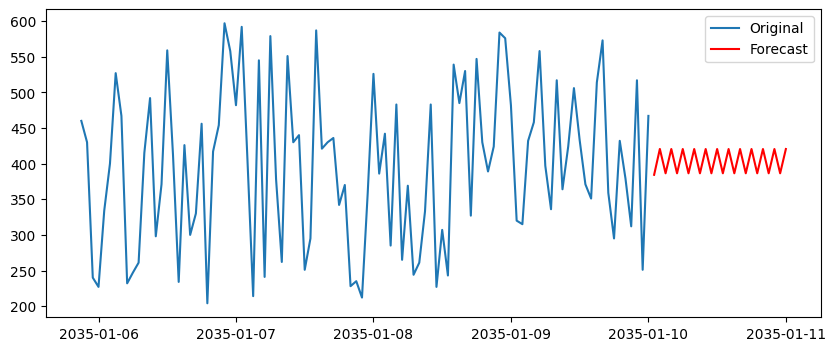

In [2]:
# ARIMA Forecasting Model

import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = pd.read_csv('simulated_traffic_v2i.csv', parse_dates=['Timestamp'])
df.set_index('Timestamp', inplace=True)

# ARIMA needs one variable
traffic_series = df['Vehicle_Count']

model = ARIMA(traffic_series, order=(2, 1, 2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=24)
print(forecast)

plt.figure(figsize=(10, 4))
plt.plot(traffic_series[-100:], label="Original")
plt.plot(forecast, label="Forecast", color='red')
plt.legend()
plt.show()


Epoch 1/10


c:\Users\ANIKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2975
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2150 
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1600 
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0984 
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0944 
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0854 
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0898 
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0886 
Epoch 9/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0881 
Epoch 10/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0907 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


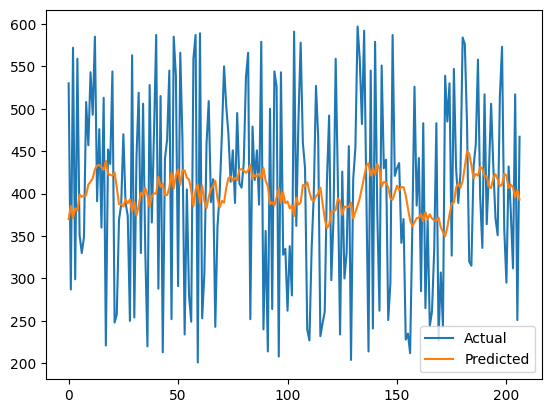

In [3]:
# LSTM Traffic Prediction (Simplified Example)

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('simulated_traffic_v2i.csv', parse_dates=['Timestamp'])
df.set_index('Timestamp', inplace=True)

data = df[['Vehicle_Count']].values
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Prepare LSTM sequences
def create_sequences(data, seq_length=10):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data)

# LSTM Model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=10, batch_size=32)

predicted = model.predict(X)

plt.plot(scaler.inverse_transform(y), label='Actual')
plt.plot(scaler.inverse_transform(predicted), label='Predicted')
plt.legend()
plt.show()
